In [1]:
#dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_df = pd.read_csv("Resources/DataScience_salaries_2024.csv")
data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [17]:
year_data = data_df.sort_values('work_year')
reduced_df = year_data[['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']]
clean_data_df = reduced_df.rename(columns={"work_year":"Working Year", "experience_level":"Experience Level",
                                    "employment_type":"Employment Type", "job_title":"Job Title",
                                    "salary_in_usd":"Salary (USD)", "employee_residence":"Employee Residence (Country)",
                                    "remote_ratio":"Remote Work Ratio", "company_location":"Location of Company (Country)",
                                   "company_size":"Size of Company"})
clean_data_df

,Working Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
14837,2020,EN,PT,ML Engineer,15966,DE,100,DE,S
11754,2020,MI,FT,Business Data Analyst,95000,US,0,US,M
11989,2020,EN,FT,Data Analyst,91000,US,100,US,L
12242,2020,MI,FT,Data Engineer,112872,GB,50,GB,L
458,2020,EX,FT,Managing Director Data Science,300000,US,100,US,L
...,...,...,...,...,...,...,...,...,...
2433,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
2434,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
2435,2024,MI,FT,Machine Learning Engineer,210100,US,0,US,M
2430,2024,MI,FT,Data Engineer,210100,US,0,US,M


In [21]:
work_year_counts = clean_data_df['Working Year'].value_counts()

print(work_year_counts)

Working Year
2023    8519
2024    4374
2022    1652
2021     218
2020      75
Name: count, dtype: int64


In [61]:
clean_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14838 entries, 14837 to 12013
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Working Year                   14838 non-null  int64 
 1   Experience Level               14838 non-null  object
 2   Employment Type                14838 non-null  object
 3   Job Title                      14838 non-null  object
 4   Salary (USD)                   14838 non-null  int64 
 5   Employee Residence (Country)   14838 non-null  object
 6   Remote Work Ratio              14838 non-null  int64 
 7   Location of Company (Country)  14838 non-null  object
 8   Size of Company                14838 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.6+ MB


In [25]:
non_numeric = clean_data_df[~clean_data_df["Salary (USD)"].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric)

Empty DataFrame
Columns: [Working Year, Experience Level, Employment Type, Job Title, Salary (USD), Employee Residence (Country), Remote Work Ratio, Location of Company (Country), Size of Company]
Index: []


In [27]:
clean_data_df.isnull().sum()

Working Year                     0
Experience Level                 0
Employment Type                  0
Job Title                        0
Salary (USD)                     0
Employee Residence (Country)     0
Remote Work Ratio                0
Location of Company (Country)    0
Size of Company                  0
dtype: int64

In [67]:
clean_data_df["Working Year"][0] == 2021

True

In [124]:
# Define years as a list of years
years = [2020, 2021, 2022, 2023, 2024]

# Create empty list to fill with yearly salary data
yearly_sal = [[] for i in range(5)]

for i in range(len(clean_data_df["Salary (USD)"])):
    if clean_data_df["Working Year"][i] == years [0]:
        yearly_sal[0].append(clean_data_df["Salary (USD)"][i])
    elif clean_data_df["Working Year"][i] == years [1]:
        yearly_sal[1].append(clean_data_df["Salary (USD)"][i])
    elif clean_data_df["Working Year"][i] == years [2]:
        yearly_sal[2].append(clean_data_df["Salary (USD)"][i])
    elif clean_data_df["Working Year"][i] == years [3]:
       yearly_sal[3].append(clean_data_df["Salary (USD)"][i])
    elif clean_data_df["Working Year"][i] == years [4]:
        yearly_sal[4].append(clean_data_df["Salary (USD)"][i])
yearly_sal

[[35735,
  41689,
  40481,
  33511,
  450000,
  412000,
  325000,
  300000,
  45896,
  260000,
  250000,
  190200,
  190000,
  188000,
  164000,
  117104,
  150000,
  138350,
  138000,
  135000,
  130800,
  148261,
  125000,
  120000,
  118000,
  115000,
  110000,
  106000,
  105000,
  105000,
  103000,
  100000,
  114047,
  100000,
  98000,
  95000,
  91000,
  112872,
  87000,
  109024,
  85000,
  91237,
  72000,
  70000,
  79833,
  79833,
  74130,
  70139,
  44753,
  60000,
  68428,
  76958,
  60000,
  56000,
  62726,
  62726,
  59303,
  54742,
  45760,
  51321,
  50180,
  49268,
  47899,
  42000,
  47899,
  46759,
  45618,
  42197,
  39916,
  38776,
  22809,
  20000,
  21669,
  15000,
  15966],
 [40038,
  36259,
  77364,
  63711,
  94665,
  66265,
  54094,
  54094,
  40570,
  33808,
  30428,
  29751,
  28399,
  24342,
  22611,
  21637,
  19609,
  18053,
  16904,
  16904,
  16228,
  423000,
  416000,
  276000,
  270000,
  256000,
  250000,
  250000,
  28016,
  240000,
  235000,
  187

In [126]:
#Create empty list to fill for quartile calculations
quartiles = [[] for i in range (5)]
lowerq = [[] for i in range (5)]
upperq = [[] for i in range (5)]
iqr = [[] for i in range (5)]
lower_bound = [[] for i in range (5)]
upper_bound = [[] for i in range (5)]

In [128]:
# Create an empty dictionary for outliers
outliers_list = {}

# Initialize index for quartile bound
bound_index = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(5):
    # Locate the rows which contain salary for each year
    all_years = clean_data_df.loc[clean_data_df["Working Year"] == years[i], "Salary (USD)"]
    quartiles[i] = all_years.quantile([.25, .5, .75])
    
    # Determine outliers using upper and lower bounds
    lowerq[i] = quartiles[i][0.25]
    upperq[i] = quartiles[i][0.75]
    iqr[i] = upperq[i] - lowerq[i]
    
    print(f"The lower quartile of {years[i]} is: {round(lowerq[i], 2)}")
    print(f"The upper quartile of {years[i]} is: {round(upperq[i], 2)}")
    print(f"The interquartile range of {years[i]} is: {round(iqr[i], 2)}")
    
    lower_bound[i] = lowerq[i] - (1.5 * iqr[i])
    upper_bound[i] = upperq[i] + (1.5 * iqr[i])

    outliers_list[years[i]] = []
    
    print(f"Potential outliers for {years[i]} could exist below {round(lower_bound[i], 2)}")
    print(f"Potential outliers for {years[i]} could exist above {round(upper_bound[i], 2)}")
    print("-----------------------------------------------------")

while bound_index <= 4:
    for j in range(len(clean_data_df["Salary (USD)"])):
        if (clean_data_df["Salary (USD)"][j] < lower_bound[bound_index]) and (clean_data_df["Working Year"][j] == years[bound_index]):
            outliers_list[years[bound_index]].append(clean_data_df["Salary (USD)"][j])
        
        elif (clean_data_df["Salary (USD)"][j] > upper_bound[bound_index]) and (clean_data_df["Working Year"][j] == years[bound_index]):
            outliers_list[years[bound_index]].append(clean_data_df["Salary (USD)"][j])
            
    # Increase bound index
    bound_index += 1

# Get the outliers for each salary and print them
for salary, outliers in outliers_list.items():
    rounded_outliers = [round(outlier, 2) for outlier in outliers]
    print(f'The outlier(s) for {salary}: {rounded_outliers}')

The lower quartile of 2020 is: 47899.0
The upper quartile of 2020 is: 117552.0
The interquartile range of 2020 is: 69653.0
Potential outliers for 2020 could exist below -56580.5
Potential outliers for 2020 could exist above 222031.5
-----------------------------------------------------
The lower quartile of 2021 is: 54094.0
The upper quartile of 2021 is: 138750.0
The interquartile range of 2021 is: 84656.0
Potential outliers for 2021 could exist below -72890.0
Potential outliers for 2021 could exist above 265734.0
-----------------------------------------------------
The lower quartile of 2022 is: 95000.0
The upper quartile of 2022 is: 172200.0
The interquartile range of 2022 is: 77200.0
Potential outliers for 2022 could exist below -20800.0
Potential outliers for 2022 could exist above 288000.0
-----------------------------------------------------
The lower quartile of 2023 is: 109281.5
The upper quartile of 2023 is: 190000.0
The interquartile range of 2023 is: 80718.5
Potential outli

In [130]:
all_years = clean_data_df.loc[clean_data_df["Working Year"] == years[i], "Salary (USD)"]
all_years

9049     128000
5943     159300
13343     70000
13342     70000
1440     240000
          ...  
2433     210100
2434     210100
2435     210100
2430     210100
12013     90500
Name: Salary (USD), Length: 4374, dtype: int64

In [132]:
quartiles = all_years.quantile([.25,.5,.75])
quartiles

0.25    100000.0
0.50    140000.0
0.75    187000.0
Name: Salary (USD), dtype: float64

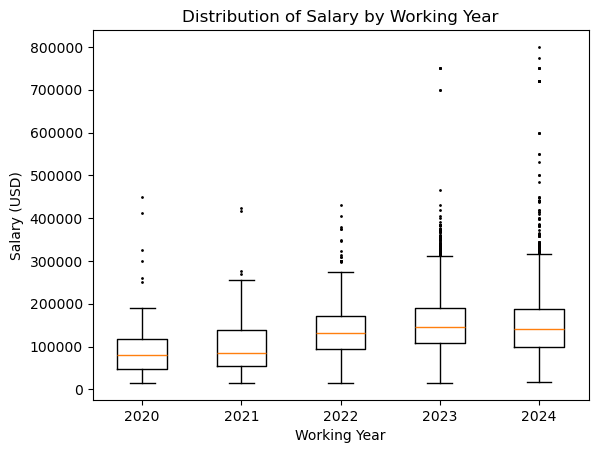

In [148]:
# Generate a box plot that shows the distribution of the salary for each working year
fig, ax = plt.subplots()
boxplot_data = [clean_data_df.loc[clean_data_df["Working Year"] == year, "Salary (USD)"] for year in years]
ax.boxplot(boxplot_data, labels=years, flierprops=dict(marker="o", markersize=1, markerfacecolor="red"))
ax.set_title('Distribution of Salary by Working Year')
ax.set_ylabel('Salary (USD)')
ax.set_xlabel('Working Year')

# Save the figure
plt.savefig("../project-one/output_data/BoxPlot.png")

#Show plut
plt.show()

In [ ]:
#IQR for our data set is $87,000. First quartile is $100,000, second quartile is $140,000, and third quartile is $187,000.
#From the above box plot, we can see each box increase on a yearly basis. 
#This leads us to believe that the salaries for new entrants in the datta scientist field are increasing. 
#We also make the observation that if this trend persists in the future, the outliers observed in 2024 will no longer be outliers.
#It's important to note that 2024 has several outliers, to the high side. We need to acknwoledge that 2024 only has data through March, while the other
    the other Working Years are a full 12 months.
